In [1]:
# Import Data Manipulation Library
import numpy as np
import pandas as pd
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import Scikit Learn Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')
# Import Tensorlfow Library
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()

In [3]:
# Checking Image Information Stats
train_images.max(), train_images.min()

(255, 0)

In [4]:
# Checking Pixel Information
train_images.shape

(60000, 28, 28)

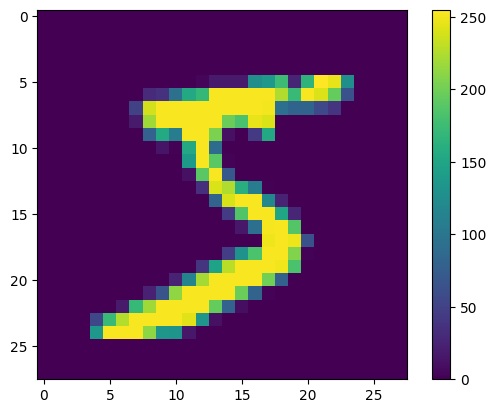

In [5]:
# Read Image using imshow Function
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

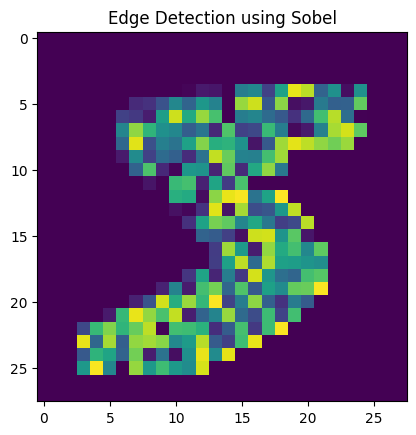

In [6]:
# Using Sobel Functionality to Check Edge Detetction

from scipy.ndimage import sobel

edges = sobel(train_images[0])  # Apply Sobel filter
plt.imshow(edges)
plt.title("Edge Detection using Sobel")
plt.show()

In [7]:
# Image Analysis Using Excel

image = train_images[0]

# this will convert image to dataframe
df = pd.DataFrame(image)

# Save to CSV
df.to_csv("mnist_image.csv", index=False, header=False)

In [8]:
# Normalize imgae values [from range 0 to 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

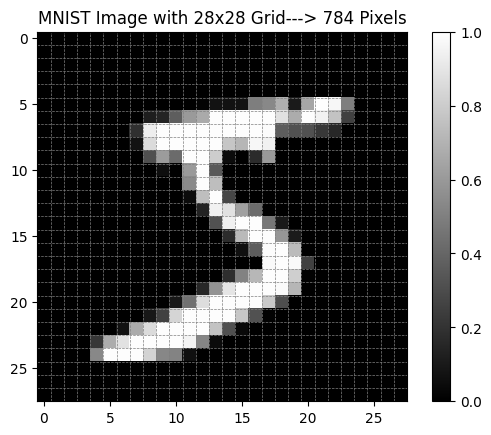

In [9]:
# Read Image with Gray Scale using imshow Function
plt.imshow(train_images[0],cmap = 'gray')

# Image Pixels --> 28*28 ---> 784 pixels
rows, cols = image.shape

for i in range(rows + 1):  # Horizontal lines
    plt.axhline(i - 0.5, color='gray', linewidth=0.5, linestyle='--')

for j in range(cols + 1):  # Vertical lines
    plt.axvline(j - 0.5, color='gray', linewidth=0.5, linestyle='--')

plt.colorbar()
plt.title("MNIST Image with 28x28 Grid---> 784 Pixels")
plt.show()

In [10]:
# Image Analysis Using Excel

image = train_images[0]

normalized_image = image / 255.0

# this will convert image to dataframe
df = pd.DataFrame(image)

# Save to CSV
df.to_csv("mnist_image_with_Grayscale.csv", index=False, header=False)

In [11]:
# Flatten the images to 1D vectors of size 784 i.e (28x28 pixels)
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Normalize and flatten images
train_images = train_images.reshape(-1, 784) / 255.0  # Convert to 1D and scale 0-1
test_images = test_images.reshape(-1, 784) / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build a simple ANN model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim = (28*28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Note :---> Mnist is Multiclass Classification Probelm with 10 Different Digits from 0 to 9


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2927 - loss: 1.9238 - val_accuracy: 0.6395 - val_loss: 1.0614
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6573 - loss: 1.0459 - val_accuracy: 0.7119 - val_loss: 0.8903
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7419 - loss: 0.8489 - val_accuracy: 0.8215 - val_loss: 0.6360
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8206 - loss: 0.6317 - val_accuracy: 0.8660 - val_loss: 0.4978
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8594 - loss: 0.5036 - val_accuracy: 0.8869 - val_loss: 0.4185
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8818 - loss: 0.4289 - val_accuracy: 0.9018 - val_loss: 0.3620
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8991 - loss: 0.3702 - val_accuracy: 0.9122 - val_loss: 0.3198
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9080 - loss: 0.3344 - val_accuracy: 0.

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 255,803 (999.23 KB)

 Trainable params: 85,267 (333.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 170,536 (666.16 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


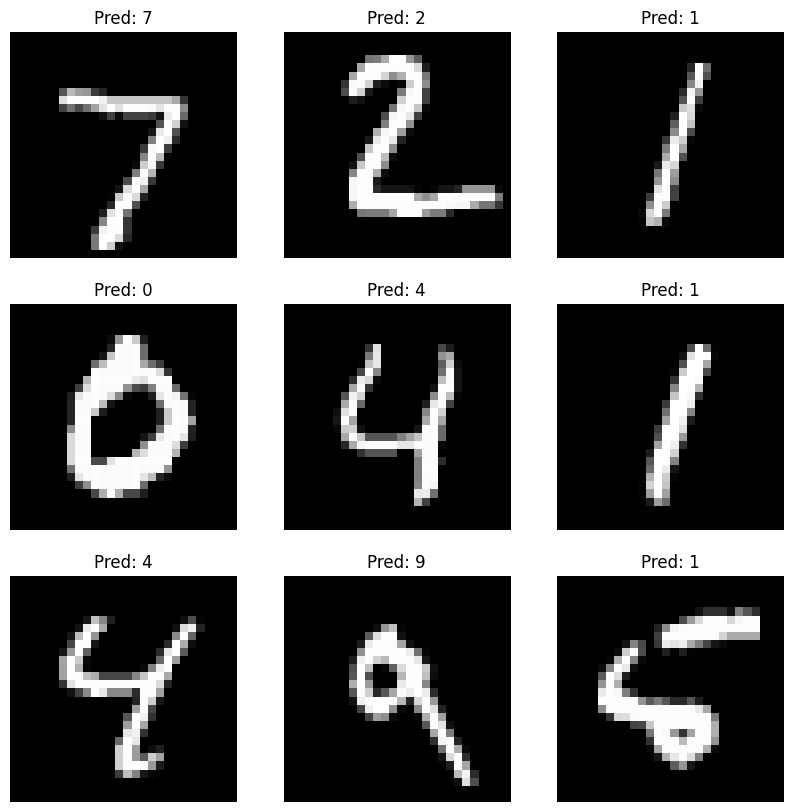

In [14]:
# Get predictions from the model
predictions = model.predict(test_images)

# Plot some test images along with the predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {tf.argmax(predictions[i]).numpy()}")
    plt.axis('off')
plt.show()

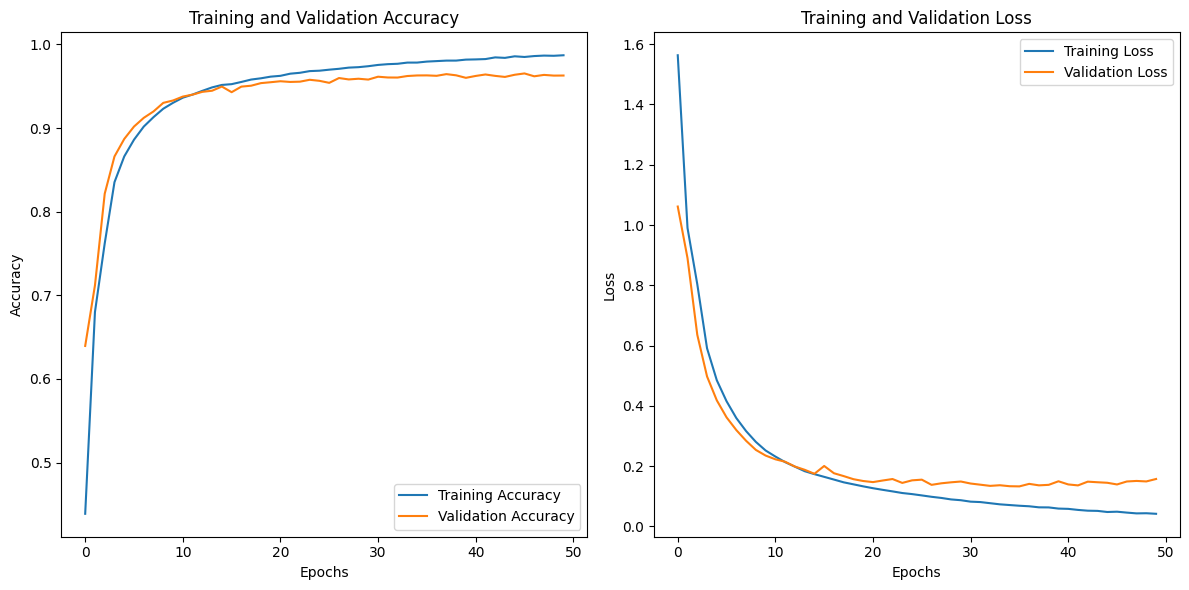

In [15]:
plt.figure(figsize=(12, 6))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy Score: 0.9648


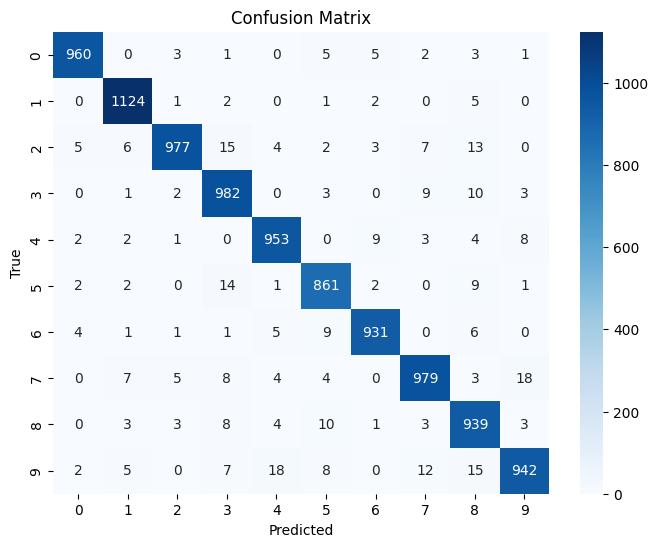


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.95      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.95      0.97      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.93      0.96      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Accuracy Score
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy Score: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report for Mnist Model Using ANN
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

In [18]:
import pickle

# Save the trained model
model.save("mnist_ann_model.h5")
print("Model saved successfully as mnist_ann_model.h5")

# model predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Save predictions
with open("mnist_predictions.pkl", "wb") as f:
    pickle.dump(y_pred_classes, f)

print("Predictions saved successfully as mnist_predictions.pkl")

Model saved successfully as mnist_ann_model.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions saved successfully as mnist_predictions.pkl
